In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

* checking membrane traces
* getting sure that inh and exc synapses have the expected effect


# 🎼 🎶 2 little spikes 🎵


In [2]:
import numpy as np
import pyNN.nest as sim
from pyNN.random import NumpyRNG
from pyNN.random import RandomDistribution as rnd
import matplotlib.pyplot as plt


CSAConnector: libneurosim support not available in NEST.
Falling back on PyNN's default CSAConnector.
Please re-compile NEST using --with-libneurosim=PATH


/usr/local/lib/python3.7/site-packages/pyNN/nest/__init__.py:55: UserWarning: Unable to install NEST extensions. Certain models may not be available.
Further details: DynamicModuleManagementError in Install: Module 'pynn_extensions' could not be opened.
The dynamic loader returned the following error: 'file not found'.

Please check LD_LIBRARY_PATH (OSX: DYLD_LIBRARY_PATH)!
  warnings.warn("Unable to install NEST extensions. Certain models may not be available.\nFurther details: {}".format(err))


In [3]:
sim.SpikeSourceArray?

Init signature: sim.SpikeSourceArray(**parameters)
Docstring:      Spike source generating spikes at the times given in the spike_times array.
Init docstring: `parameters` should be a mapping object, e.g. a dict
File:           /usr/local/lib/python3.7/site-packages/pyNN/nest/standardmodels/cells.py
Type:           type
Subclasses:     


In [4]:
dt = .1
threads = 4
N = 6
figsize = (15, 15)

neuron_parameters = {'cm': .5,  # nF - McCormick
                     'e_rev_E': 0.0,  # mV - McCormick but default values
                     'e_rev_I': -70.0,  # mV - McCormick but default values
                     'tau_m': 30,  # ms - Markram
                     'tau_refrac': 1.5,  # ms - McCormick
                     'tau_syn_E': 0.25,  # ms -McCormick
                     'tau_syn_I': 0.75,  # ms - McCormick
                     'v_reset': -62.5,  # mV - McCormick
                     'v_rest': -65.5,  # mV - McCormick
                     'v_thresh': -52.5,  # mV - McCormick
                     }

simtime = 250

time = np.arange(0, simtime+dt, dt)
sim.setup(timestep=dt)
rng = sim.NumpyRNG(seed=42)

inp = sim.Population(N, sim.SpikeSourceArray(
                                   spike_times=[42.0000, 142.0000]),#, stop=simtime, start=0),
                               label="Entrée")

exc = sim.Population(N, sim.IF_cond_exp(**neuron_parameters),
                         initial_values={"v": neuron_parameters["v_reset"]},
                         label="Neurones Exictateurs")

inh = sim.Population(N, sim.IF_cond_exp(**neuron_parameters),
                     initial_values={"v": neuron_parameters["v_reset"]},
                     label="Neurones Inhibiteurs")

syn_inp_inh = sim.Projection(inp, inh,
                             connector=sim.OneToOneConnector(),
                             synapse_type=sim.StaticSynapse(),
                             receptor_type='excitatory')

syn_inp_exc = sim.Projection(inp, exc,
                             connector=sim.OneToOneConnector(),
                             synapse_type=sim.StaticSynapse(),
                             receptor_type='excitatory')

weights = np.linspace(.5, .0, N, endpoint=True)

syn_inp_exc.set(weight=weights, delay = 5. + np.linspace(1., 9, N))
syn_inp_inh.set(weight=weights, delay = 25. +  np.linspace(.5, 4, N))

inp.record('spikes')
exc.record(['spikes', 'v'])
inh.record(['spikes', 'v'])

sim.run(simtime)

sim.end()
exc_data = exc.get_data().segments[0]

exc.get_data()

#exc_data = exc.get_data().segments[0]
#inh_data = inh.get_data().segments[0]
#inp_data = inp.get_data().segments[0]

Block with 1 segments, 1 channel_indexes
name: 'Neurones Exictateurs'
description: 'Population "Neurones Exictateurs"\n    Structure   : {\'name\': \'Line\', \'parameters\': {\'dx\': 1.0, \'x0\': 0.0, \'y\': 0.0, \'z\': 0.0}}\n    Local cells : 6\n    Cell type   : {\'name\': \'IF_cond_exp\', \'default_parameters\': {\'v_rest\': -65.0, \'cm\': 1.0, \'tau_m\': 20.0, \'tau_refrac\': 0.1, \'tau_syn_E\': 5.0, \'tau_syn_I\': 5.0, \'e_rev_E\': 0.0, \'e_rev_I\': -70.0, \'v_thresh\': -50.0, \'v_reset\': -65.0, \'i_offset\': 0.0}, \'default_initial_values\': {\'v\': -65.0, \'gsyn_exc\': 0.0, \'gsyn_inh\': 0.0}, \'parameters\': {\'v_rest\': <larray: base_value=-65.5 shape=(6,) dtype=<class \'float\'>, operations=[]>, \'cm\': <larray: base_value=0.5 shape=(6,) dtype=<class \'float\'>, operations=[]>, \'tau_m\': <larray: base_value=30.0 shape=(6,) dtype=<class \'float\'>, operations=[]>, \'tau_refrac\': <larray: base_value=1.5 shape=(6,) dtype=<class \'float\'>, operations=[]>, \'tau_syn_E\': <lar

In [5]:
syn_inp_exc.get?

Signature:
syn_inp_exc.get(
    ['attribute_names', 'format', 'gather=True', 'with_address=True', "multiple_synapses='sum'"],
)
Docstring:
Get the values of a given attribute (weight or delay) for all
connections in this Projection.

`attribute_names`:
    name of the attributes whose values are wanted, or a list of such
    names.
`format`:
    "list" or "array".
`gather`:
    If True, node 0 gets connection information from all MPI nodes,
    other nodes get information only from connections that exist in this node.
    If 'all', all nodes will receive connection information from all other nodes.
    If False, all nodes get only information about local connections.

With list format, returns a list of tuples. By default, each tuple
contains the indices of the pre- and post-synaptic cell followed by
the attribute values in the order given in `attribute_names`.
Example::

    >>> prj.get(["weight", "delay"], format="list")[:5]
    [(0.0, 0.0, 0.3401892507507171, 0.1),
     (0.0, 1.0, 0

In [6]:
Weights, delays = syn_inp_exc.get(["weight", "delay"], format="array")
Weights, delays

(array([[0.5, nan, nan, nan, nan, nan],
        [nan, 0.4, nan, nan, nan, nan],
        [nan, nan, 0.3, nan, nan, nan],
        [nan, nan, nan, 0.2, nan, nan],
        [nan, nan, nan, nan, 0.1, nan],
        [nan, nan, nan, nan, nan, 0. ]]),
 array([[ 6. ,  nan,  nan,  nan,  nan,  nan],
        [ nan,  7.6,  nan,  nan,  nan,  nan],
        [ nan,  nan,  9.2,  nan,  nan,  nan],
        [ nan,  nan,  nan, 10.8,  nan,  nan],
        [ nan,  nan,  nan,  nan, 12.4,  nan],
        [ nan,  nan,  nan,  nan,  nan, 14. ]]))

In [7]:
out = inh.get_v().segments[0]

In [8]:
out?

Type:           Segment
String form:    <neo.core.segment.Segment object at 0x12262b898>
File:           /usr/local/lib/python3.7/site-packages/neo/core/segment.py
Docstring:     
A container for data sharing a common time basis.

A :class:`Segment` is a heterogeneous container for discrete or continous
data sharing a common clock (time basis) but not necessary the same
sampling rate, start or end time.

*Usage*::
    >>> from neo.core import Segment, SpikeTrain, AnalogSignal
    >>> from quantities import Hz, s
    >>>
    >>> seg = Segment(index=5)
    >>>
    >>> train0 = SpikeTrain(times=[.01, 3.3, 9.3], units='sec', t_stop=10)
    >>> seg.spiketrains.append(train0)
    >>>
    >>> train1 = SpikeTrain(times=[100.01, 103.3, 109.3], units='sec',
    ...                     t_stop=110)
    >>> seg.spiketrains.append(train1)
    >>>
    >>> sig0 = AnalogSignal(signal=[.01, 3.3, 9.3], units='uV',
    ...                     sampling_rate=1*Hz)
    >>> seg.analogsignals.append(sig0)
    

In [9]:
from neo.core import Segment, SpikeTrain, AnalogSignal
AnalogSignal?

Init signature:
AnalogSignal(
    ['signal', 'units=None', 'dtype=None', 'copy=True', 't_start=array(0.) * s', 'sampling_rate=None', 'sampling_period=None', 'name=None', 'file_origin=None', 'description=None', 'array_annotations=None', '**annotations'],
)
Docstring:     
Array of one or more continuous analog signals.

A representation of several continuous, analog signals that
have the same duration, sampling rate and start time.
Basically, it is a 2D array: dim 0 is time, dim 1 is
channel index

Inherits from :class:`quantities.Quantity`, which in turn inherits from
:class:`numpy.ndarray`.

*Usage*::

    >>> from neo.core import AnalogSignal
    >>> import quantities as pq
    >>>
    >>> sigarr = AnalogSignal([[1, 2, 3], [4, 5, 6]], units='V',
    ...                            sampling_rate=1*pq.Hz)
    >>>
    >>> sigarr
    <AnalogSignal(array([[1, 2, 3],
          [4, 5, 6]]) * mV, [0.0 s, 2.0 s], sampling rate: 1.0 Hz)>
    >>> sigarr[:,1]
    <AnalogSignal(array([2, 5]) * V, 

In [10]:
inh_as = inh.get_data('v').segments[0]

In [11]:
v = inh_as.analogsignals[0]

In [12]:
pop = exc
pop.get_data('v').segments[0].analogsignals[0].shape

(2501, 6)

In [13]:
weights

array([0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

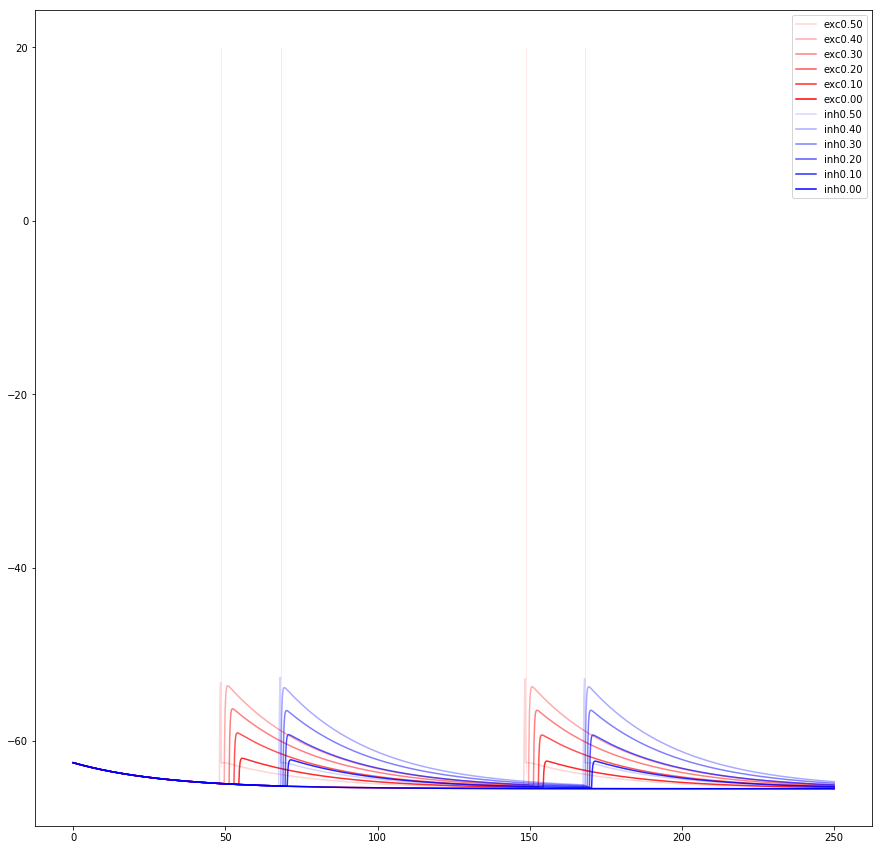

In [14]:
time = np.arange(0, simtime+dt, dt)
fig, ax = plt.subplots(1, 1, figsize=figsize)
for pop, pops, c in zip([exc, inh], ['exc', 'inh'], ['r', 'b']):
    for i in range(N):
        v = pop.get_data('v').segments[0].analogsignals[0][:, i]
        #print(weights[i])
        #print(pops + '%.2f' % (weights[i]))
        ax.plot(time, v, c, alpha=(i+1)/N, label=pops + '%.2f' % (weights[i]))
        spike_times = pop.get_data('spikes').segments[0].spiketrains[i]
        for spike_time in spike_times:
            plt.plot([spike_time, spike_time], [v[int(spike_time)] , 20], c, alpha=(i+1)/N, lw=.5)

ax.legend(loc='best');

In [15]:
pop.get_data('spikes').segments[0].spiketrains[0]

SpikeTrain
annotations: {'source_population': 'Neurones Inhibiteurs',
  'source_id': 25,
  'source_index': 0}

In [16]:
i

5

# MWE

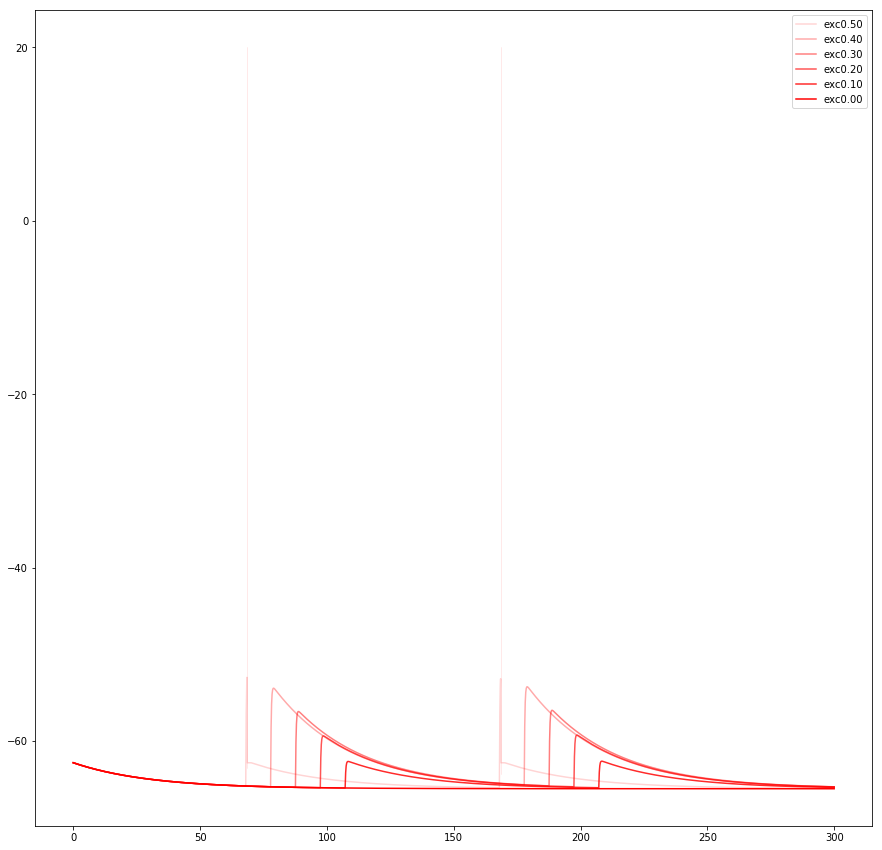

In [17]:
sim.setup(timestep=dt)
rng = sim.NumpyRNG(seed=42)
simtime = 300

inp = sim.Population(N, sim.SpikeSourceArray(
                                   spike_times=[42.0000, 142.0000]),#, stop=simtime, start=0),
                               label="Entrée")

exc = sim.Population(N, sim.IF_cond_exp(**neuron_parameters),
                         initial_values={"v": neuron_parameters["v_reset"]},
                         label="Neurones Exictateurs")

syn_inp_exc = sim.Projection(inp, exc,
                             connector=sim.OneToOneConnector(),
                             synapse_type=sim.StaticSynapse(),
                             receptor_type='excitatory')
weights = np.linspace(.5, .0, N, endpoint=True)
syn_inp_exc.set(weight=weights, delay = 25. + np.linspace(1., 50, N))

inp.record('spikes')
exc.record(['spikes', 'v'])

sim.run(simtime)

sim.end()

time = np.arange(0, simtime+dt, dt)
fig, ax = plt.subplots(1, 1, figsize=figsize)
#for pop, pops, c in zip([exc, inh], ['exc', 'inh'], ['r', 'b']):
for pop, pops, c in zip([exc], ['exc'], ['r']):
    for i in range(N):
        v = pop.get_data('v').segments[0].analogsignals[0][:, i]
        ax.plot(time, v, c, label=pops + '%.2f' % (weights[i]), alpha=(i+1)/N)
        spike_times = pop.get_data('spikes').segments[0].spiketrains[i]
        for spike_time in spike_times:
            plt.plot([spike_time, spike_time], [v[int(spike_time)] , 20], c, alpha=(i+1)/N, lw=.5)
ax.legend(loc='best');

# MWE : FFI

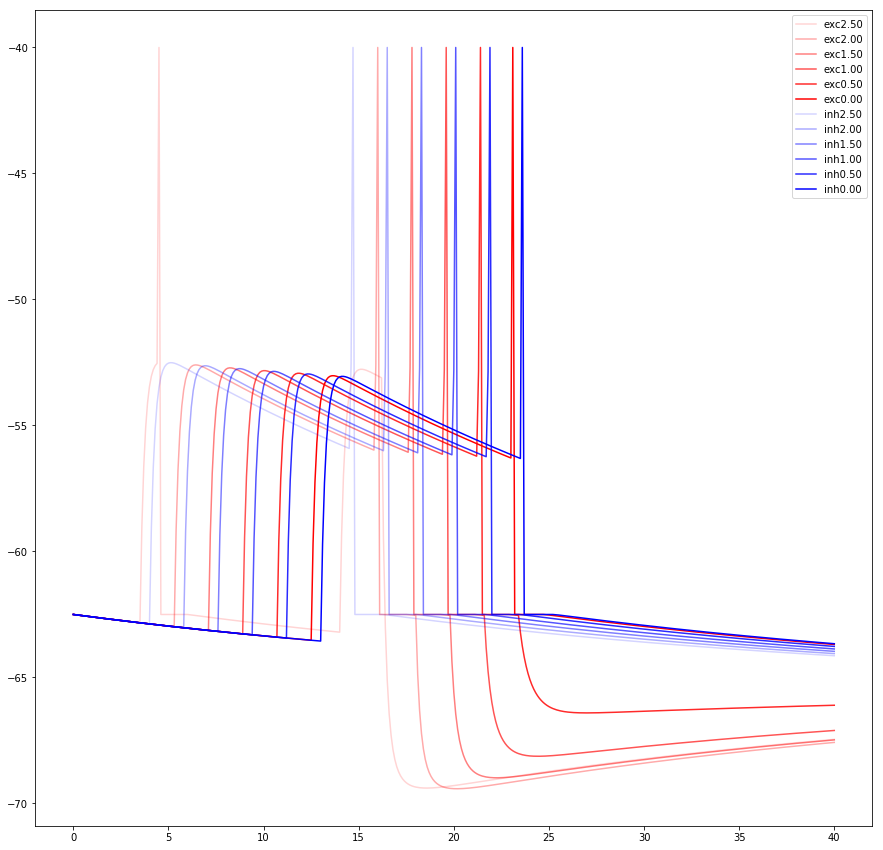

In [31]:

sim.setup(timestep=dt)
rng = sim.NumpyRNG(seed=42)
simtime = 40

inp = sim.Population(N, sim.SpikeSourceArray(
                                   spike_times=[2.0000, 12.5000]),#, stop=simtime, start=0),
                               label="Entrée")

exc = sim.Population(N, sim.IF_cond_exp(**neuron_parameters),
                         initial_values={"v": neuron_parameters["v_reset"]},
                         label="Neurones Exictateurs")

inh = sim.Population(N, sim.IF_cond_exp(**neuron_parameters),
                     initial_values={"v": neuron_parameters["v_reset"]},
                     label="Neurones Inhibiteurs")

syn_inp_inh = sim.Projection(inp, inh,
                             connector=sim.OneToOneConnector(),
                             synapse_type=sim.StaticSynapse(),
                             receptor_type='excitatory')

syn_inp_exc = sim.Projection(inp, exc,
                             connector=sim.OneToOneConnector(),
                             synapse_type=sim.StaticSynapse(),
                             receptor_type='excitatory')

syn_inh_exc = sim.Projection(inh, exc,
                             connector=sim.OneToOneConnector(),
                             synapse_type=sim.StaticSynapse(),
                             receptor_type='inhibitory')

weight_0 = .38
weights_exc = np.linspace(weight_0, weight_0, N, endpoint=True)
syn_inp_exc.set(weight=weights_exc, delay = 1.5 + np.linspace(0., 9, N))
weights_inh = np.linspace(weight_0, weight_0, N, endpoint=True)
syn_inp_inh.set(weight=weights_inh, delay = 2. + np.linspace(0., 9, N))
weights_ffi = np.linspace(2.5, .0, N, endpoint=True)
syn_inh_exc.set(weight=weights_ffi, delay = 1.5 + np.linspace(0., 0, N))

inp.record('spikes')
exc.record(['spikes', 'v'])
inh.record(['spikes', 'v'])

sim.run(simtime)
sim.end()

time = np.arange(0, simtime+dt, dt)

fig, ax = plt.subplots(1, 1, figsize=figsize)
for pop, pops, c in zip([exc, inh], ['exc', 'inh'], ['r', 'b']):
    for i in range(N):
        v = np.array(pop.get_data('v').segments[0].analogsignals[0][:, i])
        spike_times = pop.get_data('spikes').segments[0].spiketrains[i]
        for spike_time in spike_times:
            v[int(spike_time/dt)] = -40
#            plt.plot([spike_time, spike_time], [v[int(spike_time)] , -40], c, alpha=(i+1)/N)
        ax.plot(time, v, c, label=pops + '%.2f' % (weights_ffi[i]), alpha=(i+1)/N)

ax.legend(loc='best');
